In [ ]:
import torch

# 7. Linear Regression

In [ ]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute gradients and loss
# - backward pass: gradients
# - update weights

import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
# 0)prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [ ]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [ ]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4457.2817
epoch: 20, loss = 3325.7466
epoch: 30, loss = 2506.4663
epoch: 40, loss = 1912.6683
epoch: 50, loss = 1481.8910
epoch: 60, loss = 1169.1069
epoch: 70, loss = 941.8142
epoch: 80, loss = 776.5245
epoch: 90, loss = 656.2424
epoch: 100, loss = 568.6580


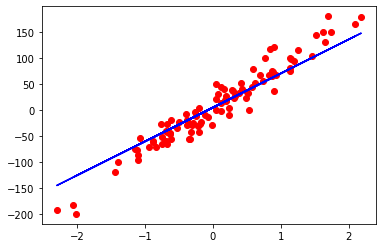

In [ ]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# 8. Logistic Regression

In [ ]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute gradients and loss
# - backward pass: gradients
# - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

569 30


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler() # makes our data to zero mean and unit variance (recommended for logistic regression)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [ ]:
# 1) model
# f = wx + b, sigmoid at the end
# we write our own class
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  
  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted
  
model = LogisticRegression(n_features)

In [ ]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# 4) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()

  # updates
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

epoch: 10, loss = 0.4403
epoch: 20, loss = 0.3770
epoch: 30, loss = 0.3343
epoch: 40, loss = 0.3034
epoch: 50, loss = 0.2799
epoch: 60, loss = 0.2613
epoch: 70, loss = 0.2462
epoch: 80, loss = 0.2336
epoch: 90, loss = 0.2230
epoch: 100, loss = 0.2137


In [ ]:
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')

accuracy = 0.9211


# 9. Dataset and Dataloader

epoch = 1 forward and backward pass of ALL training samples

batch_size = number of training samples in one forward & backward pass

number of iterations = number of passes, each pass using \[batch_size\] number of samples

e.g. 100 samples, batch_size=20 --> 100/20 = 5 iterations for 1 epoch

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
class WineDataset(Dataset): # inheriting Dataset

  def __init__(self):
    # data loading
    xy = np.loadtxt('/content/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
    self.n_samples = xy.shape[0]
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return self.n_samples

In [ ]:
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [ ]:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

tensor([[1.2250e+01, 1.7300e+00, 2.1200e+00, 1.9000e+01, 8.0000e+01, 1.6500e+00,
         2.0300e+00, 3.7000e-01, 1.6300e+00, 3.4000e+00, 1.0000e+00, 3.1700e+00,
         5.1000e+02],
        [1.1410e+01, 7.4000e-01, 2.5000e+00, 2.1000e+01, 8.8000e+01, 2.4800e+00,
         2.0100e+00, 4.2000e-01, 1.4400e+00, 3.0800e+00, 1.1000e+00, 2.3100e+00,
         4.3400e+02],
        [1.2330e+01, 9.9000e-01, 1.9500e+00, 1.4800e+01, 1.3600e+02, 1.9000e+00,
         1.8500e+00, 3.5000e-01, 2.7600e+00, 3.4000e+00, 1.0600e+00, 2.3100e+00,
         7.5000e+02],
        [1.3880e+01, 1.8900e+00, 2.5900e+00, 1.5000e+01, 1.0100e+02, 3.2500e+00,
         3.5600e+00, 1.7000e-01, 1.7000e+00, 5.4300e+00, 8.8000e-01, 3.5600e+00,
         1.0950e+03]]) tensor([[2.],
        [2.],
        [2.],
        [1.]])


In [ ]:
# dummy training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

178 45


In [ ]:
# dummy training loop
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
      # forward backward, update
      if (i+1) % 5 == 0:
        print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


In [ ]:
# torchvision.datasets.MNIST()
# other datasets available: fashion-mnist, cifar, coco